# $\color{ForestGreen}{\text{A Toy Dataset}}$

In this example, we construct a dataset whose samples are drawn from Gaussian distributions for each continuous feature. The goal is to apply the Gaussian Naive Bayes classifier to this problem. We can easily employ the $\textsf{numpy}$ built command $\textsf{np.random.normal}(\mu, \sigma, n)$ to generate a sample of size $n$ from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$.

In [1]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

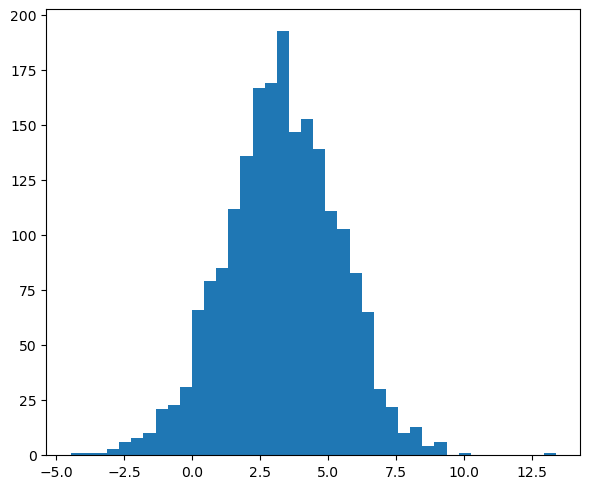

In [2]:
# Defining a function to generate a sample from a gaussian distribution with mean 'mu' and 
# standard deviation 'sigma' with some random noise with strength 'noise_strength'

def gaussian_data(mu, sigma, size, noise_strength):
    noise = np.array([noise_strength*np.random.uniform(mu-5*sigma, mu+5*sigma) for _ in range(size)])
    return np.random.normal(mu, sigma, size) + noise
           

fig, axs = plt.subplots(1, 1, figsize =(6, 5), tight_layout = True)
 
axs.hist(gaussian_data(3, 2, 2000, 0.1), bins = 40)  # Plotting the histogram of the sample
plt.show()

In [3]:
# Defining the function to create the above described dataset

def gaussian_df(mu_list, sigma_list, size, noise_strength):
    df = pd.DataFrame()
    for i in range(len(mu_list)):
        df['x%d' %(i+1)] = gaussian_data(mu_list[i], sigma_list[i], size, noise_strength)
    df['Class'] = 1
    for i in range(len(mu_list)):
        df['Class'] = df['Class'] * (df['x%d' %(i+1)] - mu_list[i])
    df['Class'] = df.Class.apply(lambda x: 1 if x>0 else -1)
    return df

In [4]:
# Creating dataset 'toy_df' of size 2000 with 5 continuous features drawn from gaussian distributions with 
# means [1, 19, 42, 57, 79] and standard deviations [2, 1, 4, 1, 2]

mu_list = [1, 19, 42, 57, 79]
sigma_list = [2, 1, 4, 1, 2]

toy_df = gaussian_df(mu_list, sigma_list, 2000, 0.3)
toy_df.sample(5)

,x1,x2,x3,x4,x5,Class
548,5.725393,25.766609,57.091688,73.623009,104.570014,1
602,2.364427,23.633003,52.479917,73.953817,102.044983,1
434,-1.706587,23.460072,45.419226,73.699448,103.080272,-1
456,-3.961078,24.378076,50.607360,73.689783,104.817751,-1
480,8.298553,26.486833,64.568771,73.474927,106.414912,1


In [5]:
# Finding the size of each class

print('The size of +1 Class:', len(toy_df[toy_df['Class']==1]))
print('The size of -1 Class:', len(toy_df[toy_df['Class']==-1]))

The size of +1 Class: 1088
The size of -1 Class: 912


In [6]:
# Defining the features and the target of the model

X = toy_df[toy_df.columns[:-1]].values     # Features
y = toy_df[toy_df.columns[-1]].values      # Target 

In [7]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## $\color{ForestGreen}{\text{Gaussian Naive Bayes Classifier}}$

In [8]:
# Importing 'GaussianNB' from naive_bayes module

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()              # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)       # Fitting the training data

GaussianNB()

In [9]:
# Finding the predictions of the model for the train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [10]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

Gaussian NB Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.97      0.98       720
           1       0.98      0.99      0.99       880

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600
 


Gaussian NB Test Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      0.94      0.97       192
           1       0.95      1.00      0.97       208

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



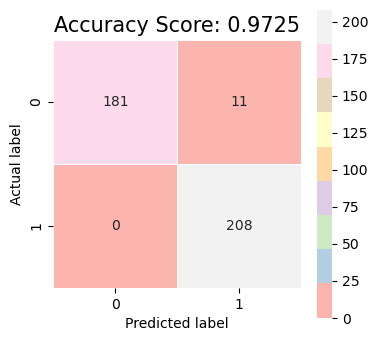

In [11]:
# Computing the confusion matrix

gnb_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(gnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

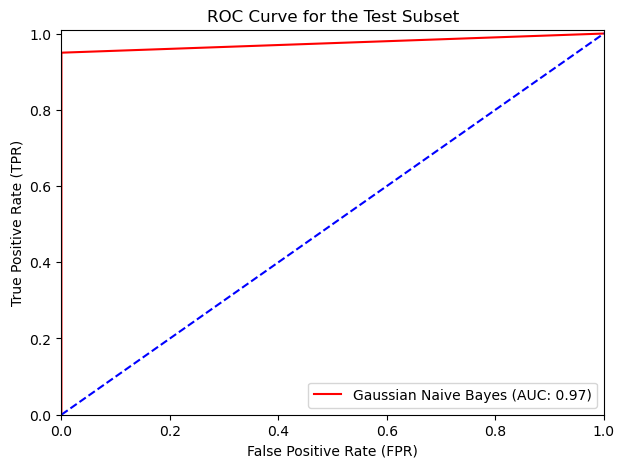

In [12]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Gaussian Naive Bayes (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

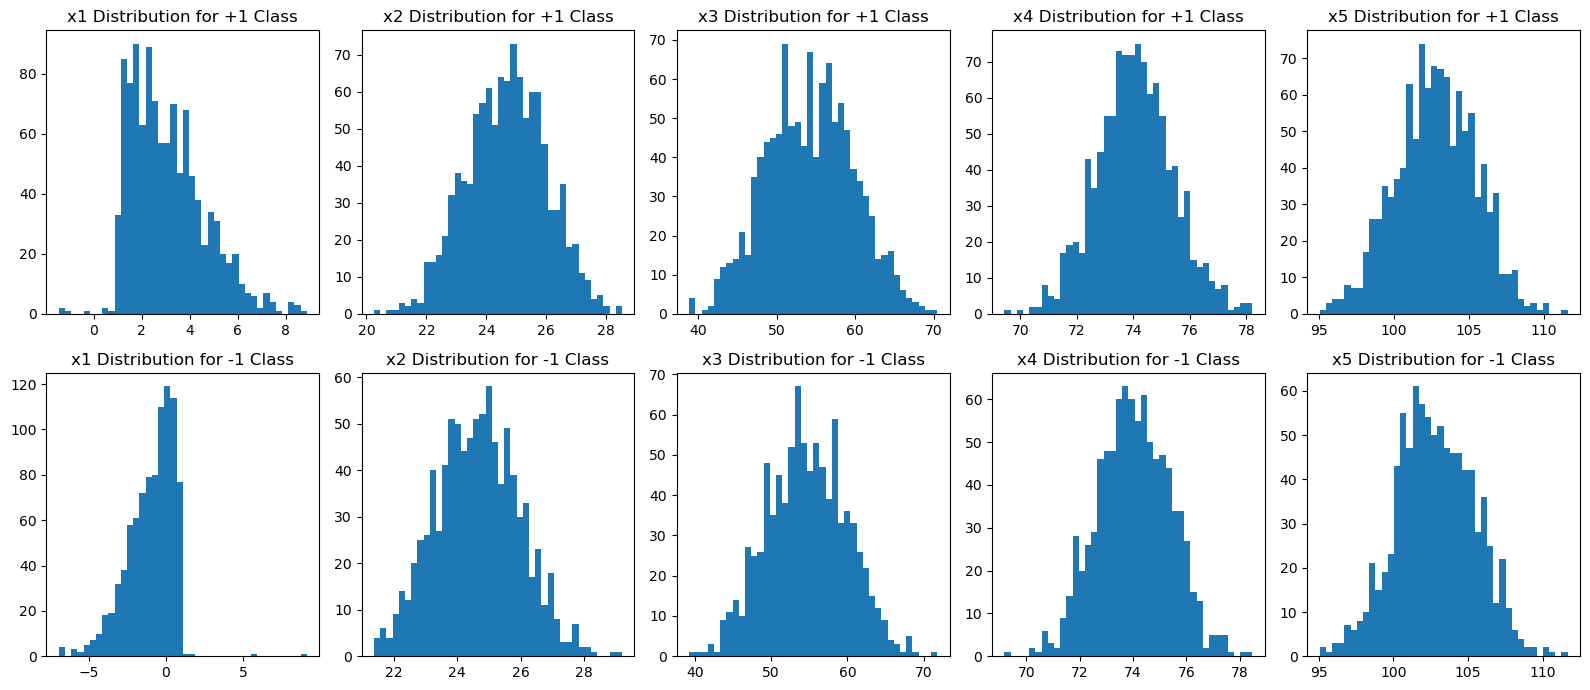

In [13]:
# Checking the distribution of each feature in each class (+1 and -1 classes)

fig, axs = plt.subplots(2, len(mu_list), figsize=(16, 7), tight_layout=True)
for j in range(len(mu_list)):
    x_plus_arr = toy_df[toy_df['Class']==1]['x%d' %(j+1)].values
    x_minus_arr = toy_df[toy_df['Class']==-1]['x%d' %(j+1)].values
    axs[0, j].hist(x_plus_arr, bins = 40)
    axs[0, j].set_title('x%d Distribution for +1 Class' %(j+1))
    axs[1, j].hist(x_minus_arr, bins = 40)
    axs[1, j].set_title('x%d Distribution for -1 Class' %(j+1))
plt.show()

## $\color{ForestGreen}{\text{Logistic Regression Classifier}}$

In [14]:
# Converting classes from -1 and 1 to 0 and 1 
# (Note for binary logistic regression, the classes must be labeled by 0 and 1)

y_train = np.where(y_train!=1, 0, y_train)
y_test = np.where(y_test!=1, 0, y_test)

In [15]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

# Finding predictions of the logistic regression model for train and test subsets
train_y_pred = logreg.predict_proba(X_train).argmax(axis=1)   
test_y_pred = logreg.predict_proba(X_test).argmax(axis=1)  

In [16]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Logistic Regression Train Classification Report: \n\n', train_report,'\n\n')
print('Logistic Regression Test Classification Report: \n\n', test_report)

Logistic Regression Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99       720
           1       0.98      0.99      0.99       880

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600
 


Logistic Regression Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       192
           1       0.99      1.00      1.00       208

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



## $\color{ForestGreen}{\text{A Tiny Change in the Dataset}}$

In [17]:
# Only the middle element of mu_list has changed (from 42 to 2)

mu_list_2 = [1, 19, 2, 57, 79]
sigma_list_2 = [2, 1, 4, 1, 2]

toy_df_2 = gaussian_df(mu_list_2, sigma_list_2, 2000, 0.3)
toy_df_2.sample(5)

,x1,x2,x3,x4,x5,Class
131,-0.520586,26.871634,2.875786,73.210103,100.665194,-1
865,3.218600,25.531922,-1.307470,73.491295,103.176401,-1
883,3.668972,25.812782,1.767374,73.913567,100.714648,-1
331,1.352996,24.133590,9.320232,74.861106,105.517339,1
1288,0.834264,26.478197,-5.829750,73.945269,100.827241,1


In [25]:
toy_df_2.describe()

,x1,x2,x3,x4,x5,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1.380584,24.719945,2.553306,74.017274,102.570004,0.00900
std,2.602948,1.319437,5.390553,1.303002,2.692018,1.00021
min,-6.215559,20.878701,-15.141609,70.073600,94.675234,-1.00000
25%,-0.342801,23.824576,-1.106568,73.107319,100.683861,-1.00000
50%,1.400779,24.734023,2.617652,73.972894,102.589859,1.00000
75%,3.175800,25.640771,6.291613,74.945938,104.426224,1.00000
max,10.327699,29.076860,24.036095,78.712903,111.633223,1.00000


In [18]:
# Checking the size of each class

print('The size of +1 Class:', len(toy_df_2[toy_df_2['Class']==1]))
print('The size of -1 Class:', len(toy_df_2[toy_df_2['Class']==-1]))

The size of +1 Class: 1009
The size of -1 Class: 991


In [19]:
# Defining the features and the target of the model

X = toy_df_2[toy_df_2.columns[:-1]].values     # Features
y = toy_df_2[toy_df_2.columns[-1]].values      # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [20]:
gnb_clf = GaussianNB()              # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)       # Fitting the training data

GaussianNB()

In [21]:
# Finding the predictions of the model for the train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [22]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Train Classification Report: \n\n', train_report,'\n\n')
print('Test Classification Report: \n\n', test_report)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.52      0.47      0.50       788
           1       0.53      0.57      0.55       812

    accuracy                           0.52      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.52      0.52      0.52      1600
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.56      0.52      0.54       203
           1       0.54      0.58      0.56       197

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



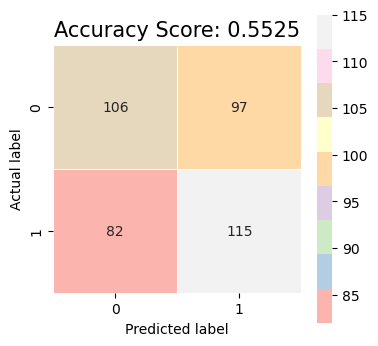

In [23]:
# Computing the confusion matrix

gnb_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(gnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

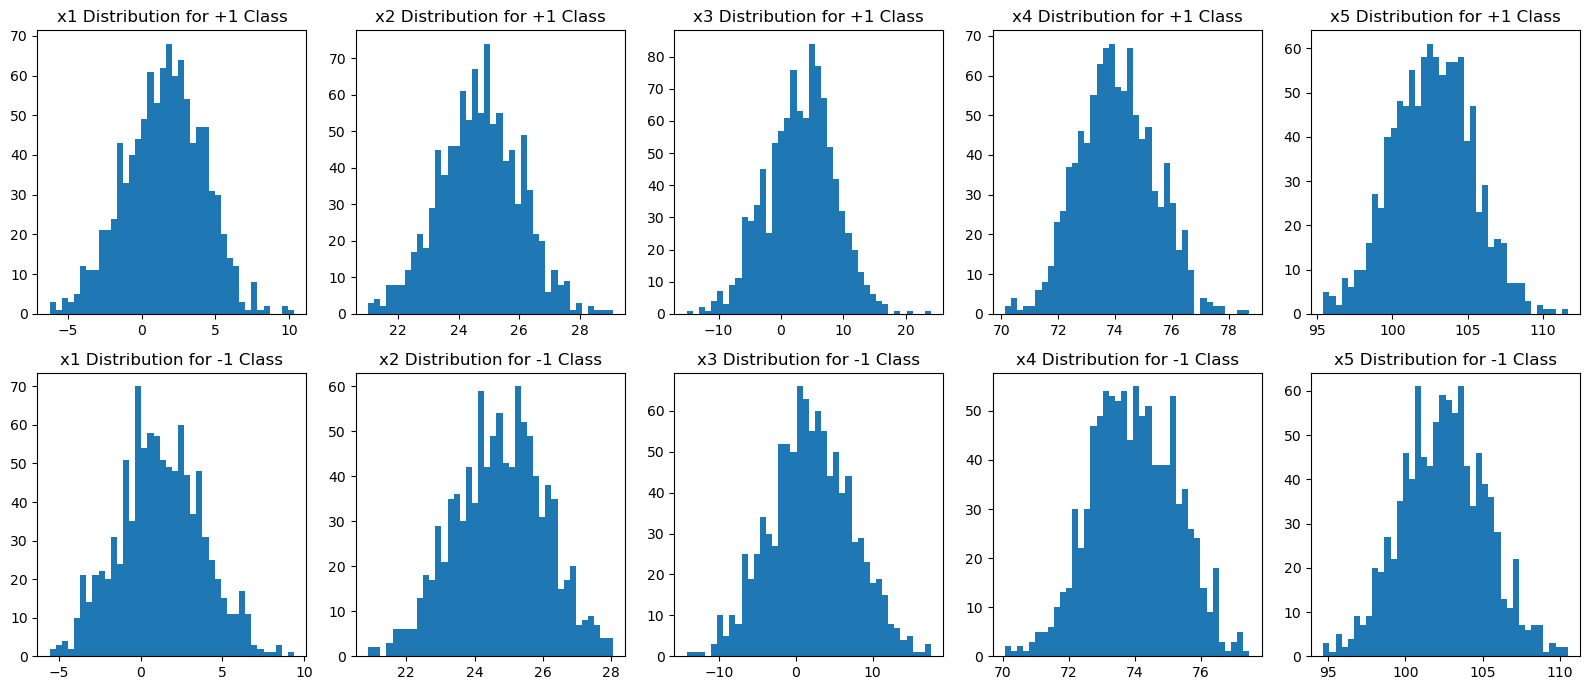

In [26]:
# Checking the distribution of each feature in each class (+1 and -1 classes)

fig, axs = plt.subplots(2, len(mu_list_2), figsize=(16, 7), tight_layout=True)
for j in range(len(mu_list_2)):
    x_plus_arr = toy_df_2[toy_df_2['Class']==1]['x%d' %(j+1)].values
    x_minus_arr = toy_df_2[toy_df_2['Class']==-1]['x%d' %(j+1)].values
    axs[0, j].hist(x_plus_arr, bins = 40)
    axs[0, j].set_title('x%d Distribution for +1 Class' %(j+1))
    axs[1, j].hist(x_minus_arr, bins = 40)
    axs[1, j].set_title('x%d Distribution for -1 Class' %(j+1))
plt.show()